# Data Preprocessing

In [1]:
import time
#start_time = time.time()

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_log_error

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df= pd.read_excel('Neff_CL.xlsx')

In [4]:
df.head(3)

,d1(µm),d2(µm),p(µm),tg(µm),na,wl(µm),Neff core (real-imaginary),Neff y core real,Confinement Loss
0,0.6,1.0,2.0,0.03,1.31,0.40,1.468976662930966-5.242989999317293E-6i,1.468977,7.153519
1,0.6,1.0,2.0,0.03,1.31,0.41,1.4678701284077638-8.710439644980253E-6i,1.467870,11.594631
2,0.6,1.0,2.0,0.03,1.31,0.42,1.4668416577301797-1.124317402231305E-5i,1.466842,14.609668


In [5]:
df.shape

(5268, 9)

In [6]:
for column in df.columns:
    print(column,':',df[column].unique())

d1(µm) : [0.6 1.6 1.4 1.2 0.8 1. ]
d2(µm) : [1.  0.8 0.6 1.2]
p(µm) : [2.  2.5 3. ]
tg(µm) : [0.03 0.04 0.05 0.06]
na : [1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41 1.42]
wl(µm) : [0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53
 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67
 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.8
 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94
 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08
 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22
 1.23 1.24 1.25 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.6
 1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71 1.72 1.73 1.74
 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83 1.84 1.85 1.86 1.87 1.88
 1.89 1.9  1.91 1.92 1.93 1.94 1.95 0.79 0.8  0.81 0.82 0.83 0.84 0.85
 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.98 0.99 0.97 1.01 1.03 1.07
 1.09 1.13 1.14 1.15 1.16 1.17

In [7]:
df.columns

Index(['d1(µm)', 'd2(µm)', 'p(µm)', 'tg(µm)', 'na', 'wl(µm)',
       'Neff core (real-imaginary)', 'Neff y core real', 'Confinement Loss '],
      dtype='object')

In [8]:
data=df[['d1(µm)', 'd2(µm)', 'p(µm)', 'tg(µm)', 'na', 'wl(µm)', 'Neff y core real', 'Confinement Loss ']]

In [9]:
data.columns

Index(['d1(µm)', 'd2(µm)', 'p(µm)', 'tg(µm)', 'na', 'wl(µm)',
       'Neff y core real', 'Confinement Loss '],
      dtype='object')

In [10]:
data.shape

(5268, 8)

In [11]:
data.loc[data.duplicated(), :]

,d1(µm),d2(µm),p(µm),tg(µm),na,wl(µm),Neff y core real,Confinement Loss
4238,0.6,1.0,2.5,0.03,1.41,0.78,1.451069,47.402916
4396,0.6,1.0,2.5,0.04,1.41,0.87,1.448698,39.805653
4397,0.6,1.0,2.5,0.04,1.41,0.88,1.448446,48.881936
4403,0.6,1.0,2.5,0.04,1.41,0.94,1.447440,238.981821
4404,0.6,1.0,2.5,0.04,1.41,0.95,1.447166,333.972602
4405,0.6,1.0,2.5,0.04,1.41,0.96,1.447703,256.382459
4524,0.6,1.0,2.5,0.05,1.41,1.02,1.446141,122.029008
4534,0.6,1.0,2.5,0.05,1.41,1.13,1.444020,67.011052
4661,0.6,1.0,2.5,0.06,1.41,0.98,1.446881,32.908578
4663,0.6,1.0,2.5,0.06,1.41,1.00,1.446481,42.703974


In [12]:
data = data.drop_duplicates()
data.shape

(5252, 8)

In [13]:
data.isnull().sum().sum()

0

In [14]:
data.isnull().sum()

d1(µm)               0
d2(µm)               0
p(µm)                0
tg(µm)               0
na                   0
wl(µm)               0
Neff y core real     0
Confinement Loss     0
dtype: int64

In [15]:
# Identify rows with any null values
rows_with_nulls = data[data.isnull().any(axis=1)]

# Display rows with null values
print(rows_with_nulls)

Empty DataFrame
Columns: [d1(µm), d2(µm), p(µm), tg(µm), na, wl(µm), Neff y core real, Confinement Loss ]
Index: []


In [16]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

d1(µm)               float64
d2(µm)               float64
p(µm)                float64
tg(µm)               float64
na                   float64
wl(µm)               float64
Neff y core real     float64
Confinement Loss     float64
dtype: object

In [17]:
#Null value filling with mean
for col in numeric_features:
    data[col].fillna(data[col].mean(), inplace=True)

In [18]:
data.isnull().sum().sum()

0

In [19]:
min_value = data['wl(µm)'].min()
max_value = data['wl(µm)'].max()
print("wl(µm)",min_value)
print("wl(µm)",max_value)

wl(µm) 0.4
wl(µm) 2.3


In [20]:
min_value = data['Neff y core real'].min()
max_value = data['Neff y core real'].max()
print("Neff_y_real min=",min_value)
print("Neff_y_real max=",max_value)

Neff_y_real min= 1.41519574859376
Neff_y_real max= 1.46898137376909


In [21]:
min_value = data['Confinement Loss '].min()
max_value = data['Confinement Loss '].max()
print("Conf_Loss min=",min_value)
print("Conf_Loss max=",max_value)

Conf_Loss min= 0.7325829954821064
Conf_Loss max= 664.2580873078402


## Train Test Split

In [22]:
X=data[['d1(µm)', 'd2(µm)', 'p(µm)', 'tg(µm)', 'na', 'wl(µm)']]
Y=data[['Neff y core real']]

In [23]:
X_validate=X[20:40]
X=X.drop(labels=range(20, 40), axis=0)
X_validate.shape

(20, 6)

In [24]:
X.shape

(5232, 6)

In [25]:
X.head()

,d1(µm),d2(µm),p(µm),tg(µm),na,wl(µm)
0,0.6,1.0,2.0,0.03,1.31,0.40
1,0.6,1.0,2.0,0.03,1.31,0.41
2,0.6,1.0,2.0,0.03,1.31,0.42
3,0.6,1.0,2.0,0.03,1.31,0.43
4,0.6,1.0,2.0,0.03,1.31,0.44


In [26]:
Y_validate=Y[20:40]
Y=Y.drop(labels=range(20, 40), axis=0)
Y_validate.shape

(20, 1)

In [27]:
Y.shape

(5232, 1)

In [28]:
Y.head()

,Neff y core real
0,1.468977
1,1.467870
2,1.466842
3,1.465881
4,1.464980


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Scalling

In [30]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [31]:
scaler1.fit(X)
scaler2.fit(Y)

x_train = scaler1.transform(X_train)
y_train = scaler2.transform(Y_train)
x_test = scaler1.transform(X_test)
y_test = scaler2.transform(Y_test)

x_validate = scaler1.transform(X_validate)
y_validate = scaler2.transform(Y_validate)
#scaler_datafile=DataFrame(scaler_datafile_1,  columns = data.columns)
#X=scaler_datafile[['d1(um)', 'd2(um)', 'tg(um)', 'na', 'wl']]
#Y=DataFrame(scaler_out_datafile_1,  columns = out_var_datafile_1.columns)


#data for validation with actual data#

In [32]:
y_train

array([[0.61747337],
       [0.59617113],
       [0.71935005],
       ...,
       [0.68633049],
       [0.60840216],
       [0.75761754]])

In [33]:
y_test

array([[0.7970415 ],
       [0.67149583],
       [0.68934497],
       ...,
       [0.689787  ],
       [0.68292882],
       [0.63684528]])

In [34]:
x_train

array([[1.        , 0.33333333, 0.        , 0.33333333, 0.09090909,
        0.2       ],
       [0.        , 0.66666667, 1.        , 0.        , 1.        ,
        0.31578947],
       [0.6       , 0.66666667, 0.        , 0.33333333, 0.36363636,
        0.12105263],
       ...,
       [0.        , 0.66666667, 1.        , 1.        , 0.72727273,
        0.2       ],
       [0.        , 0.66666667, 1.        , 1.        , 0.90909091,
        0.31578947],
       [0.        , 0.66666667, 0.        , 1.        , 0.18181818,
        0.1       ]])

In [35]:
x_test

array([[0.6       , 0.33333333, 0.        , 0.33333333, 0.        ,
        0.07368421],
       [0.8       , 0.33333333, 0.        , 0.33333333, 0.09090909,
        0.15789474],
       [0.6       , 1.        , 0.        , 0.33333333, 0.45454545,
        0.14736842],
       ...,
       [0.6       , 1.        , 0.        , 0.33333333, 0.54545455,
        0.13684211],
       [0.        , 0.66666667, 0.        , 0.66666667, 0.09090909,
        0.15789474],
       [0.        , 0.66666667, 0.5       , 1.        , 0.72727273,
        0.24210526]])

# **RandomForestRegressor**

In [36]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(x_train, y_train)

y_train_pred = modelRF.predict(x_train)
y_test_pred = modelRF.predict(x_test)
#x_train_pred=x_train_pred.reshape(-1,1)
#x_test_pred=x_test_pred.reshape(-1,1)

RF_train_MSE=mean_squared_error(y_train,y_train_pred)
RF_test_MSE=mean_squared_error(y_test,y_test_pred)
RF_train_r2=r2_score(y_train,y_train_pred)
RF_test_r2=r2_score(y_test,y_test_pred)

print('MSE train data: %.7f, MSE test data: %.7f' % (RF_train_MSE,RF_test_MSE))
print('R2 train data: %.7f, R2 test data: %.7f' % (RF_train_r2,RF_test_r2))

MSE train data: 0.0000112, MSE test data: 0.0001206
R2 train data: 0.9995606, R2 test data: 0.9957995


In [37]:
# Reverse scaling the predictions
y_train_actual = scaler2.inverse_transform(y_train)
y_train_pred_actual = scaler2.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_actual = scaler2.inverse_transform(y_test)
y_test_pred_actual = scaler2.inverse_transform(y_test_pred.reshape(-1, 1))

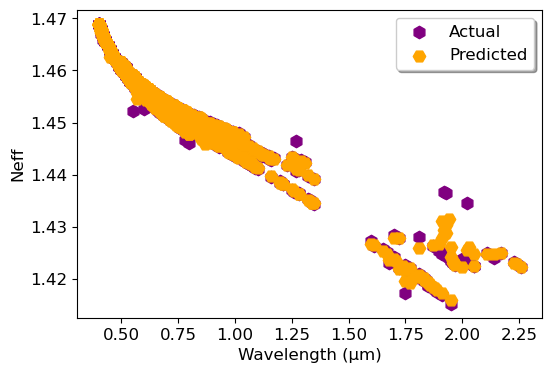

In [38]:
# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
plt.xlabel("Wavelength (µm)",fontsize=12)
plt.ylabel("Neff",fontsize=12)
# plt.title("Model Predictions vs Actual Data")

# Use scatter plots with different markers and increased marker size for better visibility
ax.scatter(X_test['wl(µm)'], y_test_actual, label="Actual", color='purple', marker='h', s=80)  # Hexagon marker
ax.scatter(X_test['wl(µm)'], y_test_pred_actual, label="Predicted", color='orange', marker='H', s=80)  # X marker

# Customize the legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.legend(fontsize='large', title_fontsize='12', loc='upper right', frameon=True, shadow=True)

plt.show()

# Data Validation

In [39]:
X_validate.head()

,d1(µm),d2(µm),p(µm),tg(µm),na,wl(µm)
20,0.6,1.0,2.0,0.03,1.31,0.60
21,0.6,1.0,2.0,0.03,1.31,0.61
22,0.6,1.0,2.0,0.03,1.31,0.62
23,0.6,1.0,2.0,0.03,1.31,0.63
24,0.6,1.0,2.0,0.03,1.31,0.64


In [40]:
Y_validate.head()

,Neff y core real
20,1.455577
21,1.455167
22,1.454771
23,1.454386
24,1.454012


In [41]:
Wavelength=data['wl(µm)'][20:40]
Wavelength

20    0.60
21    0.61
22    0.62
23    0.63
24    0.64
25    0.65
26    0.66
27    0.67
28    0.68
29    0.69
30    0.70
31    0.71
32    0.72
33    0.73
34    0.74
35    0.75
36    0.76
37    0.77
38    0.78
39    0.79
Name: wl(µm), dtype: float64

# **Performance Comparison after K-fold**

In [42]:
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import KFold
import time

In [43]:
# Define your classifiers
models = {
    'DTR': DecisionTreeRegressor(random_state=42),
    'RFR': RandomForestRegressor(n_estimators=36, random_state=25),
    'KNN': KNeighborsRegressor(n_neighbors = 5),
    'GBR':  GradientBoostingRegressor(n_estimators=56, learning_rate=0.08, max_depth=7, random_state=82),
    'XGBR': XGBRegressor(n_estimators=53, random_state=35, max_depth=7, min_child_weight=3, learning_rate=0.24, reg_lambda=2),
    'BR' : BaggingRegressor(n_estimators=36, random_state=25),
}


In [44]:
pred_Kfold=[]
# Initialize dictionaries to store metrics for each regressor
metrics = {
    name: {'train_mae': [], 'test_mae': [], 'train_mse': [], 'test_mse': [], 'train_r2': [], 'test_r2': [], 'train_time': [], 'test_time': []} for name in models
}
scaler_x.fit(X)
scaler_y.fit(Y)

x = scaler_x.transform(X)
y = scaler_y.transform(Y)

# Set up your k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation for each regressor
for name, model in models.items():
    print(name)
    for train_index, test_index in kfold.split(X):
        start = time.time()
        Xtrain, Xtest = x[train_index], x[test_index]
        Ytrain, Ytest = y[train_index], y[test_index]

        # Train the regressor
        model.fit(Xtrain, Ytrain)
       
        ########
        y_train_pred = model.predict(Xtrain)
        end = time.time()
        train_time=end - start
        print("Train time:",train_time)
        
        start = time.time()
        y_test_pred = model.predict(Xtest)
        end = time.time()
        test_time=end - start
        print("Test time:",test_time)
        
        pred_Kfold.append(y_test_pred)

        # Calculate Performance
        train_MAE = mean_absolute_error(Ytrain,y_train_pred)
        test_MAE = mean_absolute_error(Ytest,y_test_pred)
        train_MSE=mean_squared_error(Ytrain,y_train_pred)
        test_MSE=mean_squared_error(Ytest,y_test_pred)
        train_r2=r2_score(Ytrain,y_train_pred)
        test_r2=r2_score(Ytest,y_test_pred)

        #print('MSE train data: %.7f, MSE test data: %.7f' % (train_MSE,test_MSE))
        #print('R2 train data: %.7f, R2 test data: %.7f' % (train_r2,test_r2))
        
        # Append metrics to the dictionary
        metrics[name]['train_mae'].append(train_MAE)
        metrics[name]['test_mae'].append(test_MAE)    
        metrics[name]['train_mse'].append(train_MSE)
        metrics[name]['test_mse'].append(test_MSE)
        metrics[name]['train_r2'].append(train_r2)
        metrics[name]['test_r2'].append(test_r2)
        metrics[name]['train_time'].append(train_time)
        metrics[name]['test_time'].append(test_time)
# Calculate the mean of metrics across all folds for each regressor
mean_metrics = {name: {metric: np.mean(values) for metric, values in metric_dict.items()} for name, metric_dict in metrics.items()}


DTR
Train time: 0.018948793411254883
Test time: 0.000997304916381836
Train time: 0.016956090927124023
Test time: 0.0009965896606445312
Train time: 0.0169980525970459
Test time: 0.0
Train time: 0.015975236892700195
Test time: 0.0
Train time: 0.015918493270874023
Test time: 0.00106048583984375
Train time: 0.01598334312438965
Test time: 0.0
Train time: 0.015970230102539062
Test time: 0.0010082721710205078
Train time: 0.016965389251708984
Test time: 0.0
Train time: 0.01597309112548828
Test time: 0.001009225845336914
Train time: 0.015979766845703125
Test time: 0.001007080078125
RFR
Train time: 0.5753879547119141
Test time: 0.010970830917358398
Train time: 0.57147216796875
Test time: 0.010967731475830078
Train time: 0.5644879341125488
Test time: 0.009973287582397461
Train time: 0.5644903182983398
Test time: 0.009970664978027344
Train time: 0.5695185661315918
Test time: 0.010806083679199219
Train time: 0.5605008602142334
Test time: 0.010968208312988281
Train time: 0.5715067386627197
Test time

In [45]:
result=pd.DataFrame(mean_metrics)
result=result.T
result=result[['train_r2', 'test_r2', 'train_mae', 'test_mae','train_mse', 'test_mse', 'train_time', 'test_time']]
result

,train_r2,test_r2,train_mae,test_mae,train_mse,test_mse,train_time,test_time
DTR,0.999969,0.996976,0.000045,0.002235,8.071875e-07,0.000076,0.016567,0.000608
RFR,0.999613,0.997688,0.000836,0.002156,1.021589e-05,0.000059,0.567585,0.010683
KNN,0.996607,0.993153,0.004348,0.007936,8.941502e-05,0.000181,0.044087,0.004883
GBR,0.999266,0.997492,0.002147,0.002753,1.933293e-05,0.000067,0.364931,0.002992
XGBR,0.999412,0.997916,0.001514,0.002187,1.549737e-05,0.000052,0.248035,0.006184
BR,0.999612,0.997658,0.000837,0.002170,1.023975e-05,0.000060,0.597314,0.011994


In [46]:
pred_Kfold=[]
# Define your classifiers
bestModel = RandomForestRegressor(n_estimators=36, random_state=25)

# Define your classifiers
kfoldModels = {
    '1_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '2_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '3_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '4_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '5_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '6_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '7_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '8_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '9_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '10_Fold': RandomForestRegressor(n_estimators=36, random_state=25)
}

# Initialize dictionaries to store metrics for each classifier
kFoldmetrics = {
    name: {'train_mae': [], 'test_mae': [], 'train_mse': [], 'test_mse': [], 'train_r2': [], 'test_r2': []} for name in kfoldModels
}

X_array=x
Y_array=y
# Perform k-fold cross-validation for each classifier
i = 2
for name, k_model in kfoldModels.items():
    if name == '1_Fold':
        # Single train-test split for '1_Fold'
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
        k_model.fit(x_train, y_train)
        
        y_train_pred = k_model.predict(x_train)
        y_test_pred = k_model.predict(x_test)
        y_validate_pred = k_model.predict(x_validate)
        pred_Kfold.append(y_validate_pred)

        # Calculate Performance
        train_MAE = mean_absolute_error(y_train, y_train_pred)
        test_MAE = mean_absolute_error(y_test, y_test_pred)
        train_MSE = mean_squared_error(y_train, y_train_pred)
        test_MSE = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append metrics to the dictionary
        kFoldmetrics[name]['train_mae'].append(train_MAE)
        kFoldmetrics[name]['test_mae'].append(test_MAE)    
        kFoldmetrics[name]['train_mse'].append(train_MSE)
        kFoldmetrics[name]['test_mse'].append(test_MSE)
        kFoldmetrics[name]['train_r2'].append(train_r2)
        kFoldmetrics[name]['test_r2'].append(test_r2)
        
    else:
        kfold = KFold(n_splits=i, shuffle=True, random_state=42)
        i=i+1
        for train_index, test_index in kfold.split(X_array):
            X_train, X_test = X_array[train_index], X_array[test_index]
            y_train, y_test = Y_array[train_index], Y_array[test_index]

            # Train the classifier
            k_model.fit(X_train, y_train)

            ########
            y_train_pred = k_model.predict(Xtrain)
            y_test_pred = k_model.predict(Xtest)
            y_validate_pred = k_model.predict(x_validate)
            pred_Kfold.append(y_validate_pred)

            # Calculate Performance
            train_MAE = mean_absolute_error(Ytrain,y_train_pred)
            test_MAE = mean_absolute_error(Ytest,y_test_pred)
            train_MSE=mean_squared_error(Ytrain,y_train_pred)
            test_MSE=mean_squared_error(Ytest,y_test_pred)
            train_r2=r2_score(Ytrain,y_train_pred)
            test_r2=r2_score(Ytest,y_test_pred)

            # Append metrics to the dictionary
            kFoldmetrics[name]['train_mae'].append(train_MAE)
            kFoldmetrics[name]['test_mae'].append(test_MAE)    
            kFoldmetrics[name]['train_mse'].append(train_MSE)
            kFoldmetrics[name]['test_mse'].append(test_MSE)
            kFoldmetrics[name]['train_r2'].append(train_r2)
            kFoldmetrics[name]['test_r2'].append(test_r2)

    # Calculate mean of metrics across all folds for each classifier
mean_metrics_kfold = {name: {kFoldmetrics: sum(values) / len(values) for kFoldmetrics, values in kFoldmetrics.items()} for name, kFoldmetrics in kFoldmetrics.items()}


In [47]:
kFoldresult=pd.DataFrame(mean_metrics_kfold)
kFoldresult=kFoldresult.T
kFoldresult

,train_mae,test_mae,train_mse,test_mse,train_r2,test_r2
1_Fold,0.000865,0.002484,0.000012,0.000097,0.999513,0.996618
2_Fold,0.001921,0.001877,0.000050,0.000060,0.998154,0.996899
3_Fold,0.001446,0.001442,0.000030,0.000043,0.998909,0.997776
4_Fold,0.001293,0.001313,0.000026,0.000046,0.999058,0.997635
5_Fold,0.001156,0.001173,0.000020,0.000037,0.999276,0.998091
6_Fold,0.001096,0.001113,0.000018,0.000035,0.999351,0.998199
7_Fold,0.001047,0.001051,0.000016,0.000031,0.999396,0.998396
8_Fold,0.001006,0.001026,0.000015,0.000027,0.999464,0.998637
9_Fold,0.000990,0.001013,0.000014,0.000026,0.999467,0.998686
10_Fold,0.000964,0.001003,0.000014,0.000028,0.999496,0.998581


In [48]:
pred_DT_reshape=pred_Kfold[0].reshape(-1,1)
#pred_DTB_reshape=pred_Kfold[1].reshape(-1,1)
pred_RF_reshape=pred_Kfold[1].reshape(-1,1)
#pred_RFB_reshape=pred_Kfold[3].reshape(-1,1)
pred_XGB_reshape=pred_Kfold[2].reshape(-1,1)
#pred_XGBB_reshape=pred_Kfold[5].reshape(-1,1)
pred_GB_reshape=pred_Kfold[3].reshape(-1,1)
#pred_GBB_reshape=pred_Kfold[7].reshape(-1,1)
pred_B_reshape=pred_Kfold[4].reshape(-1,1)

predDT=scaler2.inverse_transform(pred_DT_reshape)
#predDTB=scaler2.inverse_transform(pred_DTB_reshape)
predRF=scaler2.inverse_transform(pred_RF_reshape)
#predRFB=scaler2.inverse_transform(pred_RFB_reshape)
predXGB=scaler2.inverse_transform(pred_XGB_reshape)
#predXGBB=scaler2.inverse_transform(pred_XGBB_reshape)
predGB=scaler2.inverse_transform(pred_GB_reshape)
#predGBB=scaler2.inverse_transform(pred_GBB_reshape)
predB=scaler2.inverse_transform(pred_B_reshape)
Yvalidate=scaler2.inverse_transform(Y_validate)

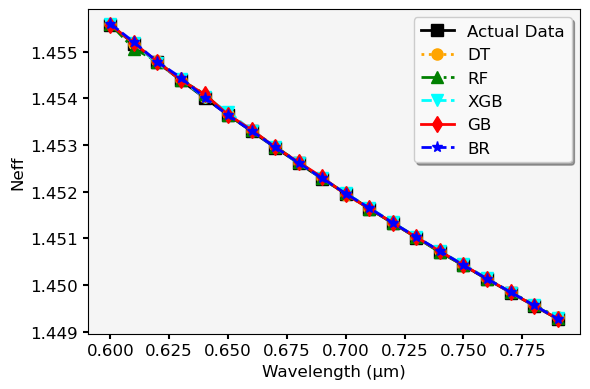

In [49]:
import matplotlib.pyplot as plt

# Create subplots with a larger figure size for better visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

# Labels and titles
ax.set_xlabel("Wavelength (µm)", fontsize=12)
ax.set_ylabel("Neff", fontsize=12)
#ax.set_title("Model Predictions vs Actual Data", fontsize=18, fontweight='bold')

# Plot actual data with a solid line and square markers
ax.plot(Wavelength, Y_validate, label="Actual Data", color='black', linewidth=2, marker='s', linestyle='-', markersize=8)

# Plot predictions with customized line styles and markers
if predDT is not None:
    ax.plot(Wavelength, predDT, label='DT', color='orange', linewidth=2, marker='o', linestyle=":", markersize=8)
if predRF is not None:
    ax.plot(Wavelength, predRF, label='RF', color='green', linewidth=2, marker='^', linestyle="-.", markersize=8)
if predXGB is not None:
    ax.plot(Wavelength, predXGB, label='XGB', color='cyan', linewidth=2, marker='v', linestyle="--", markersize=8)
if predGB is not None:
    ax.plot(Wavelength, predGB, label='GB', color='red', linewidth=2, marker='d', linestyle="-", markersize=8)
if predB is not None:
    ax.plot(Wavelength, predB, label='BR', color='blue', linewidth=2, marker='*', linestyle="--", markersize=8)

# Customizing the legend with a unique style
legend = ax.legend(loc='best', fontsize=12, frameon=True, shadow=True, fancybox=True)
legend.get_frame().set_facecolor('#f9f9f9')

# Adding grid with unique styling
#ax.grid(True, which='both', color='grey', linestyle='--', linewidth=0.5, alpha=0.7)

# Setting the background color of the plot
ax.set_facecolor('#f5f5f5')

# Customizing tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=12, width=1.5)
ax.tick_params(axis='both', which='minor', labelsize=12, width=1)

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
Y_validate

,Neff y core real
20,1.455577
21,1.455167
22,1.454771
23,1.454386
24,1.454012
25,1.453648
26,1.453294
27,1.452948
28,1.452610
29,1.452280


In [51]:
predRF

array([[1.45558857],
       [1.45506325],
       [1.45479005],
       [1.45439571],
       [1.45409174],
       [1.45364132],
       [1.45331479],
       [1.45296368],
       [1.45263301],
       [1.45228503],
       [1.45196627],
       [1.45163896],
       [1.45133069],
       [1.45102162],
       [1.45070123],
       [1.45042363],
       [1.45013061],
       [1.44985503],
       [1.44957515],
       [1.44930323]])

# XAI TEST

In [52]:
#!pip install shap
#!pip install lime
import shap
import lime
import lime.lime_tabular
from IPython.core.display import HTML, display
import matplotlib.pyplot as plt
from PIL import Image
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# SHAP

In [53]:
import shap
print(shap.__file__)

C:\Users\mrksm\AppData\Roaming\Python\Python311\site-packages\shap\__init__.py


In [54]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize and fit scalers on the original data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X)
scaler_y.fit(Y)

# 2. Scale features and target
X_scaled = scaler_x.transform(X)
Y_scaled = scaler_y.transform(Y).flatten()  # Ensure Y is 1D

# 3. Convert scaled data to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
Y_scaled_df = pd.DataFrame(Y_scaled, columns=Y.columns)

# 4. Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled_df, Y_scaled_df, test_size=0.25, random_state=42
)

# 5. Train the RandomForest model on scaled data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# 6. Calculate SHAP values using the TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)


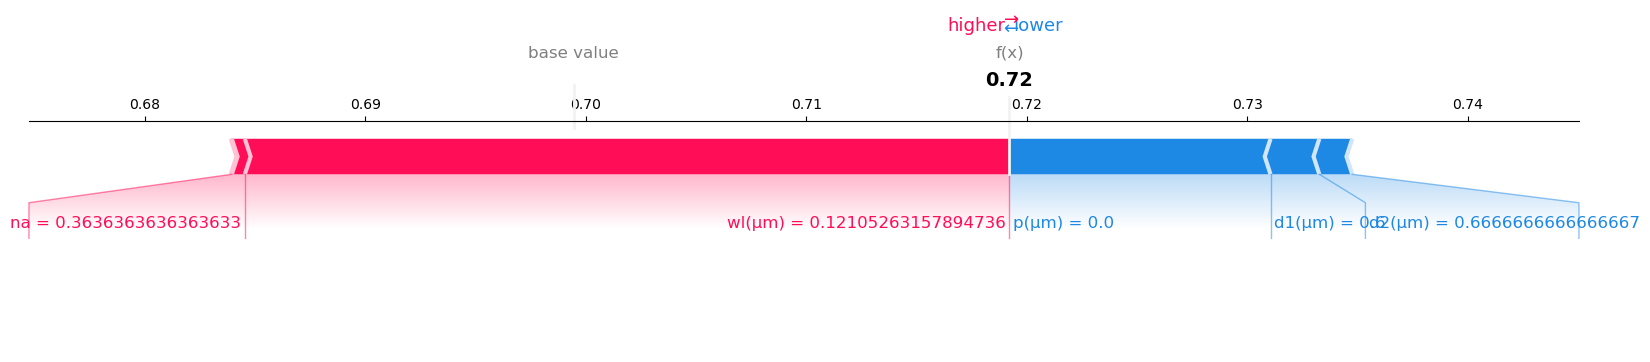

In [55]:

shap.force_plot(explainer.expected_value, shap_values.values[2, :], X_train.iloc[2, :], matplotlib=True)


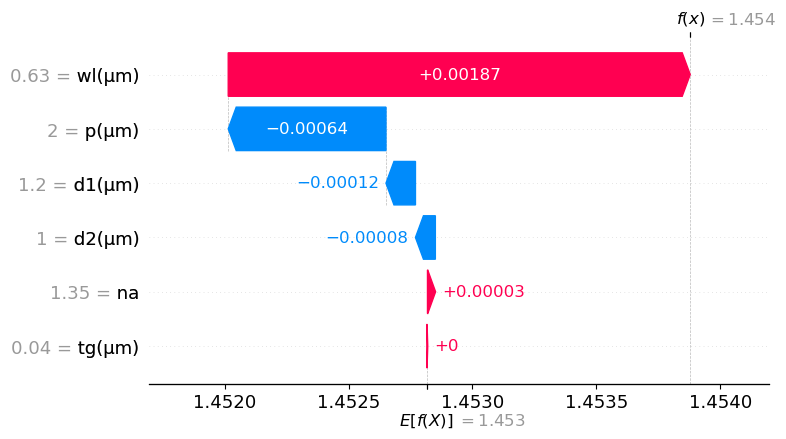

In [56]:
i=2
# 7. Get the scaled base value and predictions
shap_value_scaled = shap_values.values[i]
base_value_scaled = shap_values.base_values[i]
pred_scaled = model.predict(X_train.iloc[i].values.reshape(1, -1))[0]

# 8. Unscale the base value and prediction
shap_value_unscaled = scaler_y.inverse_transform(shap_value_scaled.reshape(-1, 1))
base_value_unscaled = scaler_y.inverse_transform([[base_value_scaled]])[0][0]
pred_unscaled = scaler_y.inverse_transform([[pred_scaled]])[0][0]

# 9. Adjust SHAP values to reflect the unscaled output range
shap_values_adjusted = shap_values.values[i] * (
    (pred_unscaled - base_value_unscaled) / shap_values.values[i].sum()
)

# 10. Unscale the input features for interpretability
X_train_unscaled = scaler_x.inverse_transform(X_train)
X_train_unscaled_df = pd.DataFrame(X_train_unscaled, columns=X.columns)

# 11. Generate the waterfall plot with adjusted SHAP values
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_adjusted,  # Adjusted SHAP values
        base_values=base_value_unscaled,  # Unscaled base value
        data=X_train_unscaled_df.iloc[i, :],  # Unscaled input features
    ),
    max_display=10  # Display the top 10 features
)


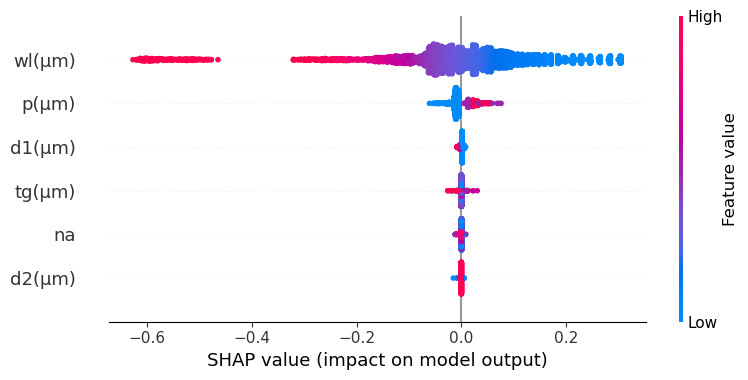

In [57]:
# Visualize the SHAP values for the training data
shap.summary_plot(shap_values, X_train)

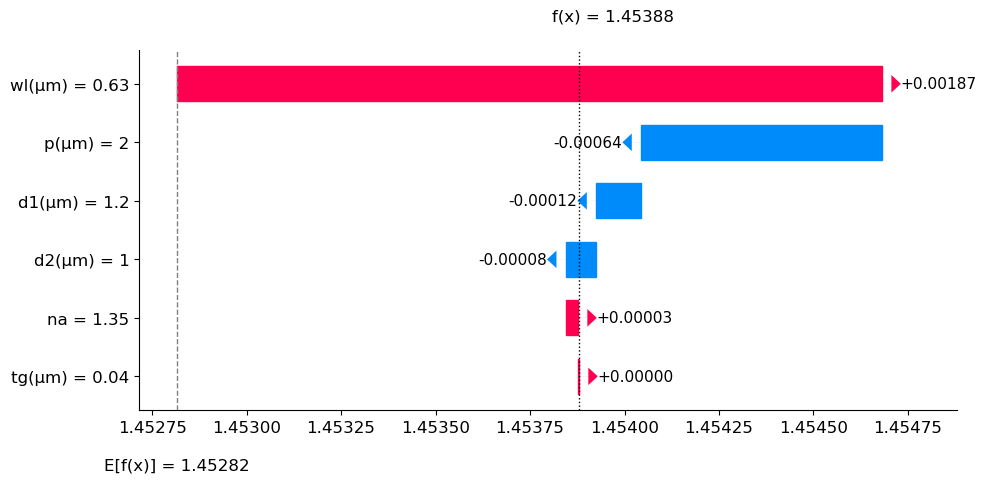

In [58]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample index
i = 2

# === 1. Get scaled SHAP values and base/prediction ===
shap_scaled = shap_values.values[i]
base_scaled = shap_values.base_values[i]
pred_scaled = model.predict(X_train.iloc[i].values.reshape(1, -1))[0]

# === 2. Unscale SHAP values ===
shap_unscaled = scaler_y.inverse_transform(shap_scaled.reshape(-1, 1)).flatten() \
                - scaler_y.inverse_transform(np.zeros_like(shap_scaled).reshape(-1, 1)).flatten()
base_unscaled = scaler_y.inverse_transform([[base_scaled]])[0][0]
pred_unscaled = scaler_y.inverse_transform([[pred_scaled]])[0][0]

# === 3. Unscale input features ===
X_train_unscaled = scaler_x.inverse_transform(X_train)
X_train_unscaled_df = pd.DataFrame(X_train_unscaled, columns=X.columns)
input_unscaled = X_train_unscaled_df.iloc[i, :].values


def shap_waterfall_filled_arrow(values, feature_names, base_value, data, max_display=None):
    # Sort features by absolute SHAP value
    sorted_idx = np.argsort(np.abs(values))[::-1]
    if max_display:
        sorted_idx = sorted_idx[:max_display]
    values = values[sorted_idx]
    features = np.array(feature_names)[sorted_idx]
    feature_values = data[sorted_idx]

    labels = [f"{feat} = {val:.3g}" for feat, val in zip(features, feature_values)]
    f_x = base_value + np.sum(values)

    fig, ax = plt.subplots(figsize=(10, 5))
    positions = np.arange(len(values))

    cumulative = base_value
    for pos, val in zip(positions, values):
        color = '#FF0051' if val > 0 else '#008BFB'
        start = cumulative
        end = cumulative + val

        # Draw filled bar
        ax.barh(pos, val, left=start, color=color, edgecolor=color, height=0.6)

        # Add larger, more prominent arrow tip
        arrow_dir = 1 if val > 0 else -1
        ax.arrow(end, pos, arrow_dir * 0.00005, 0,
                 head_width=0.3,              # Larger arrow width
                 head_length=0.0005 * 0.05, # Longer arrow head like SHAP
                 fc=color, ec=color,
                 length_includes_head=True,
                 lw=0)

        # Annotate SHAP contribution value
        ax.text(end + (0.00005 if val > 0 else -0.00005), pos,
                f"{val:+.5f}", va='center', fontsize=11,
                color='black', ha='left' if val > 0 else 'right')

        cumulative = end

    # Base value reference
    ax.axvline(base_value, color='grey', linestyle='--', linewidth=1)
    ax.text(base_value, len(values)+0.6, f"E[f(x)] = {base_value:.5f}",
            color='black', fontsize=12, ha='center')

    # Final prediction reference
    ax.axvline(f_x, color='black', linestyle=':', linewidth=1)
    ax.text(0.58, 1.08, f"f(x) = {f_x:.5f}",
            color='black', fontsize=12, ha='center', transform=ax.transAxes)

    # Formatting
    ax.set_yticks(positions)
    ax.set_yticklabels(labels, fontsize=12)
    ax.invert_yaxis()
    ax.set_xlim(min(base_value, f_x) - 0.0001, max(base_value, f_x) + 0.001)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', labelsize=12)
    ax.set_xlabel("")

    plt.tight_layout()
    plt.show()



# Call updated SHAP-style filled bar with arrow tip
shap_waterfall_filled_arrow(
    values=shap_unscaled,
    feature_names=X.columns,
    base_value=base_unscaled,
    data=input_unscaled,
    max_display=10
)


1
[1.44726119]


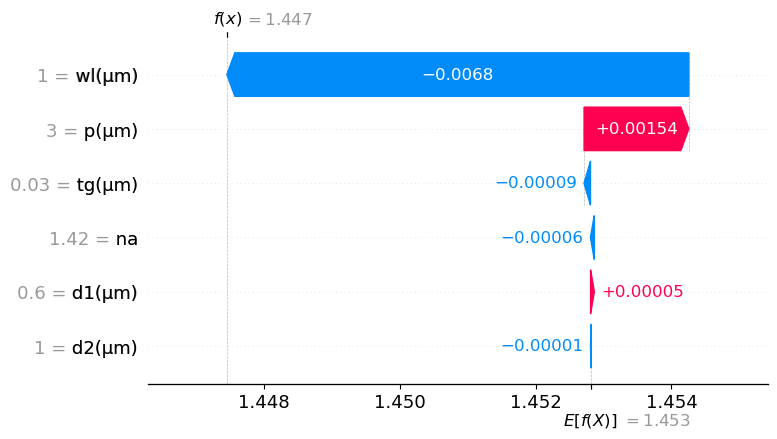

2
[1.45388644]


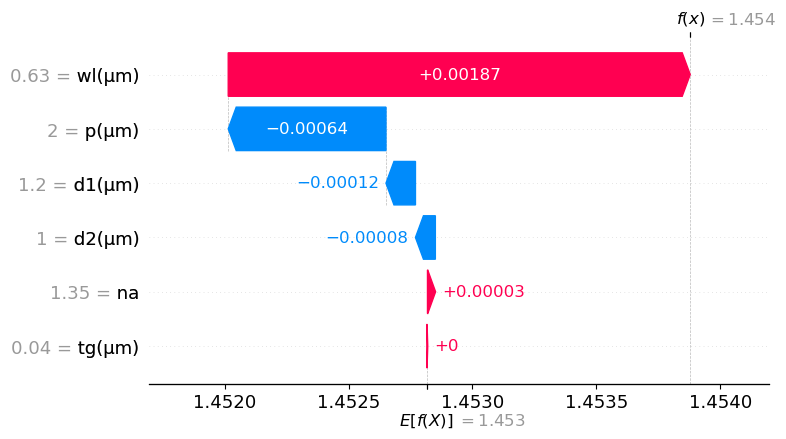

3
[1.4584634]


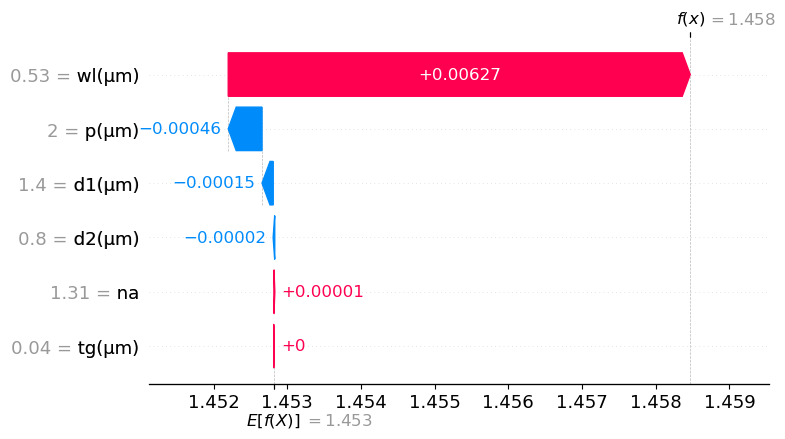

4
[1.45092456]


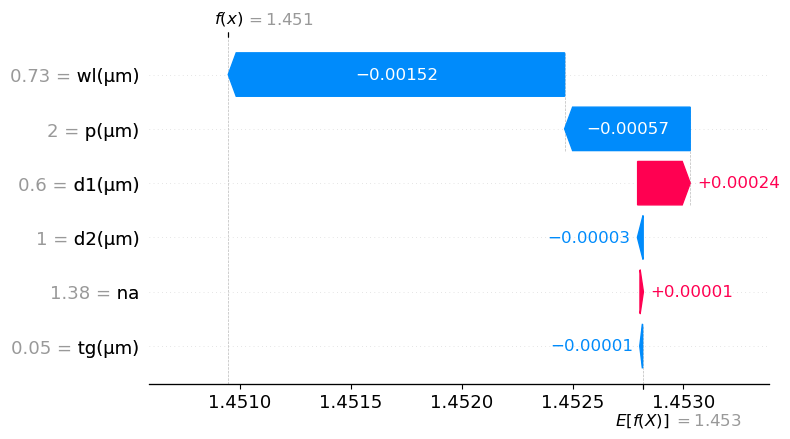

5
[1.44939679]


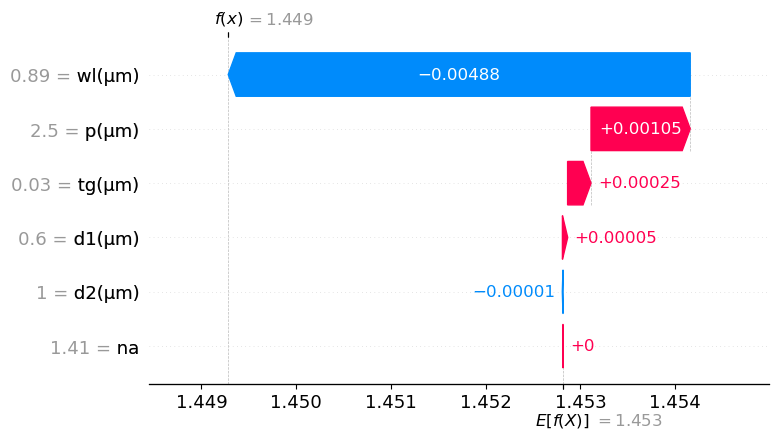

6
[1.45938067]


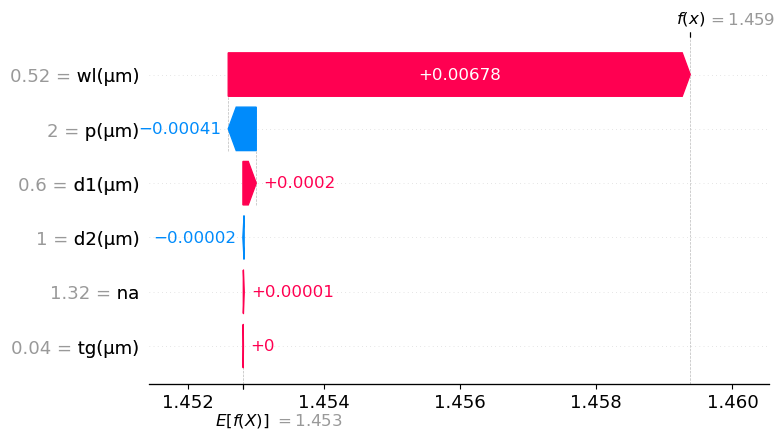

7
[1.446435]


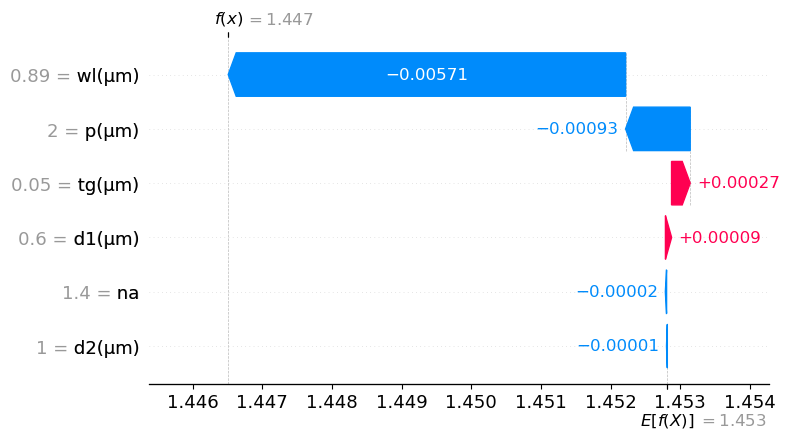

8
[1.45184391]


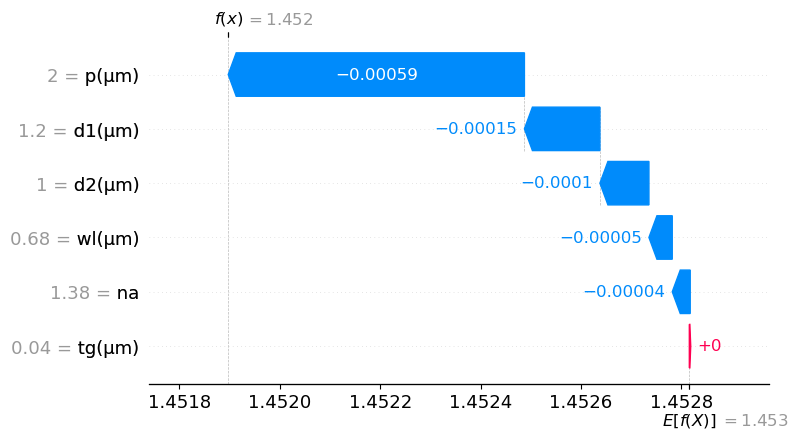

9
[1.45785571]


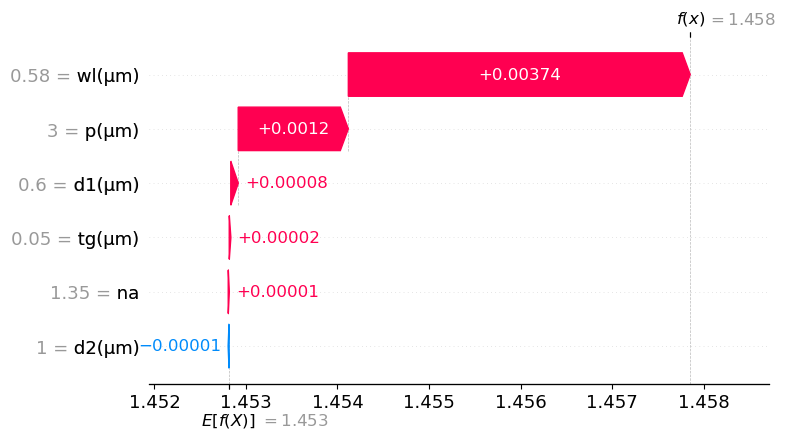

10
[1.45702929]


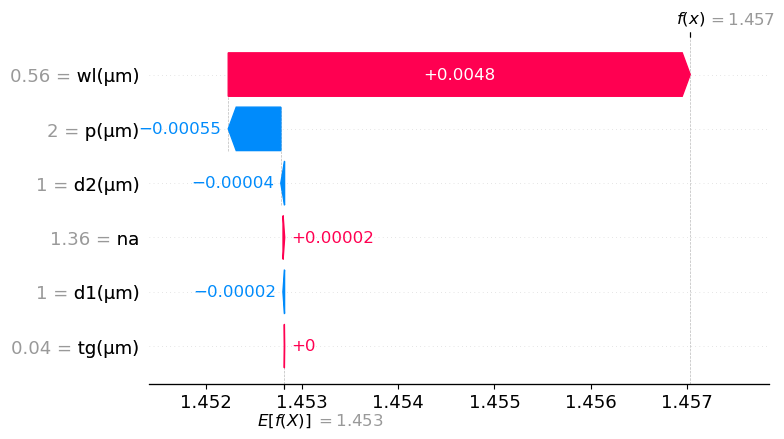

11
[1.44913087]


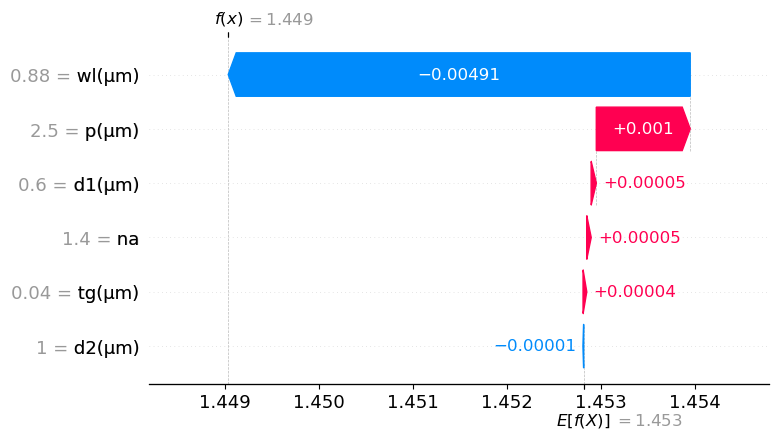

12
[1.457878]


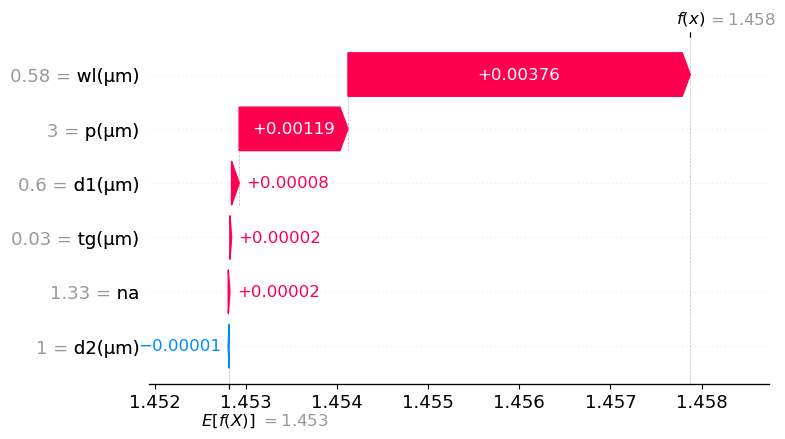

13
[1.45820567]


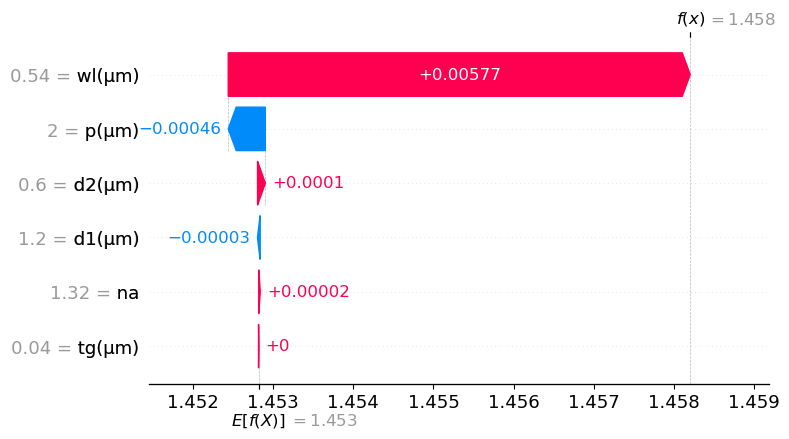

14
[1.45373091]


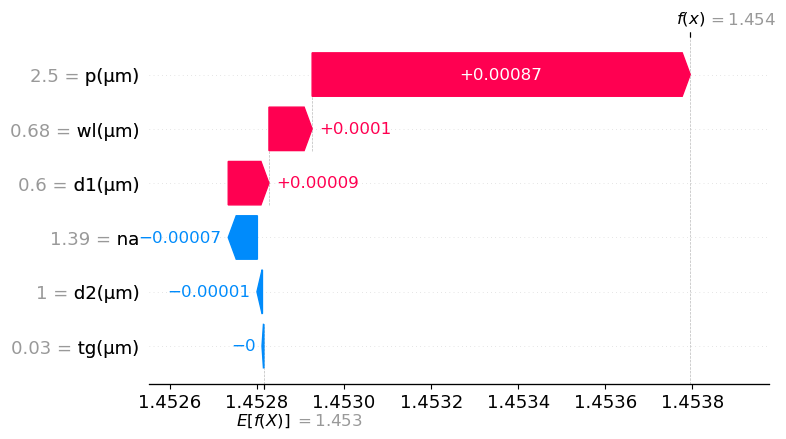

15
[1.45095898]


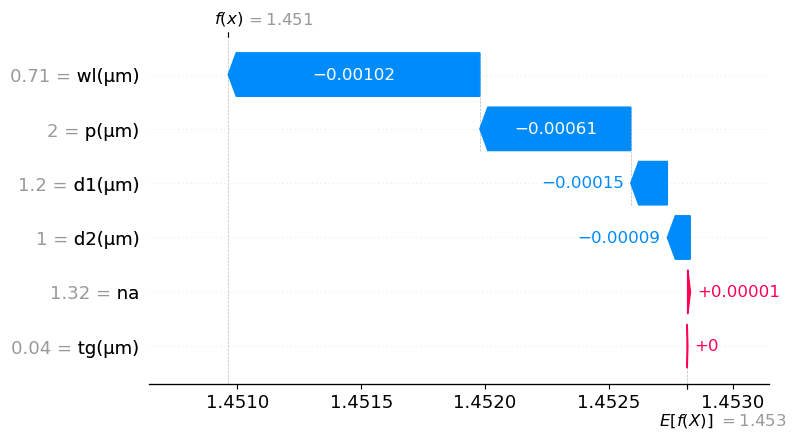

16
[1.45028967]


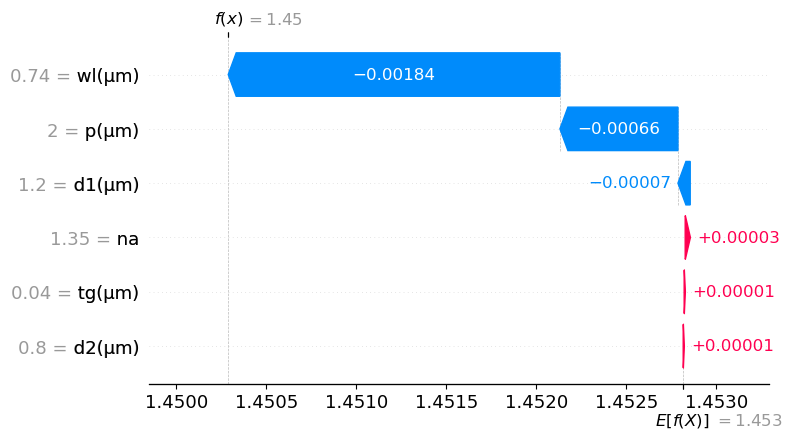

17
[1.44818599]


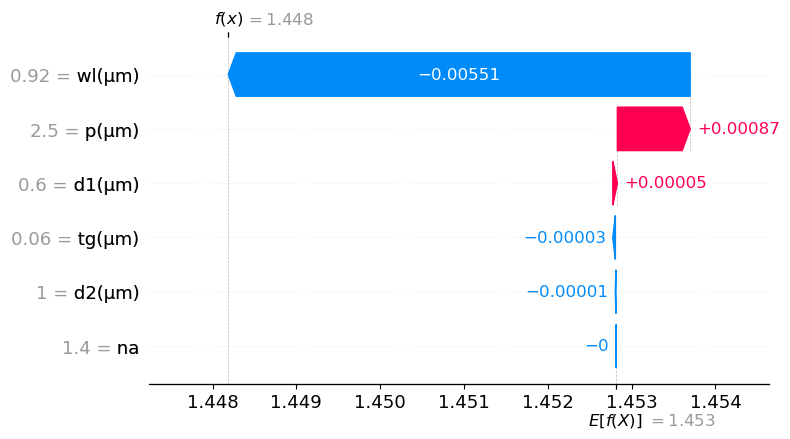

18
[1.45550493]


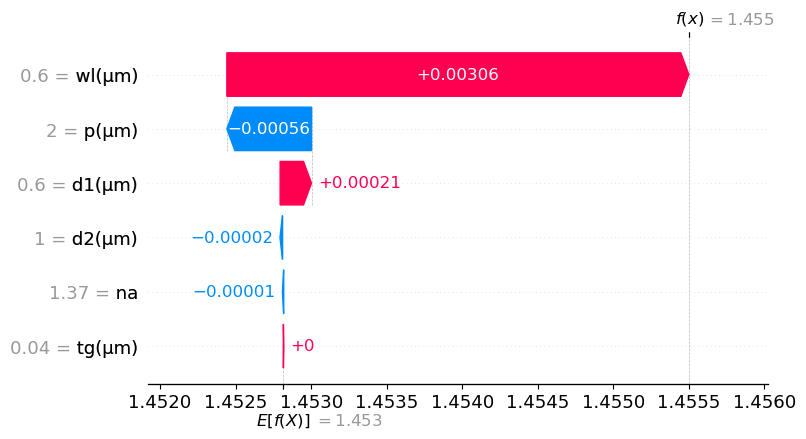

19
[1.42271403]


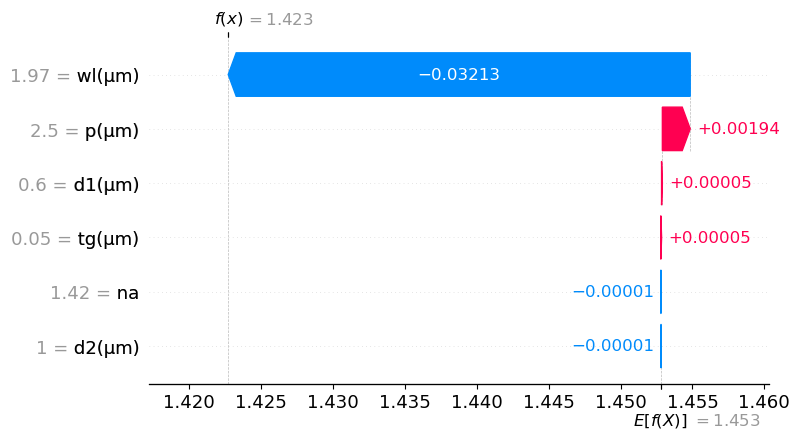

In [59]:
for i in range(1,20):
    # 7. Get the scaled base value and predictions
    base_value_scaled = shap_values.base_values[i]
    pred_scaled = model.predict(X_train.iloc[i].values.reshape(1, -1))[0]

    # 8. Unscale the base value and prediction
    base_value_unscaled = scaler_y.inverse_transform([[base_value_scaled]])[0][0]
    pred_unscaled = scaler_y.inverse_transform([[pred_scaled]])[0][0]

    # 9. Adjust SHAP values to reflect the unscaled output range
    shap_values_adjusted = shap_values.values[i] * (
        (pred_unscaled - base_value_unscaled) / shap_values.values[i].sum()
    )

    # 10. Unscale the input features for interpretability
    X_train_unscaled = scaler_x.inverse_transform(X_train)
    X_train_unscaled_df = pd.DataFrame(X_train_unscaled, columns=X.columns)
    Y_train_unscaled = scaler_y.inverse_transform(Y_train)
    
    print(i)
    print(Y_train_unscaled[i])
    # 11. Generate the waterfall plot with adjusted SHAP values
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_adjusted,  # Adjusted SHAP values
            base_values=base_value_unscaled,  # Unscaled base value
            data=X_train_unscaled_df.iloc[i, :],  # Unscaled input features
        ),
        max_display=10  # Display the top 10 features
    )
